In [1]:
#웹크롤링을 통한 리뷰 분석 시작

In [2]:
#main
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import requests
import re
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
#deriver option
option = Options()


In [325]:
#User_agent check
#driver.execute_script('return navigator.userAgent')

#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#path driver
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)

#url
url = 'https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43F8ROi2y0U2h8KlBwEuLVkCZMWDoxWDwgv4CeOBQhbvujsiqrsN_9qhoCRL0QAvD_BwE#/465083/'

#url 접속
response = requests.get(url)

driver.get(url)
driver.implicitly_wait(10)

search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
try:
    element.click()
except ValueError as m:
    print(m)
    time.sleep(1)
    driver.find_element_by_xpath(search_xpath).click()
    

#페이지 정보 업로드
html = driver.page_source
html_source = bs(html, 'html.parser')
soup = bs(html, 'html.parser')

#리뷰수 파악
num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
review_num=[]
for t in num:
    review_num.append(t.string)

<ipython-input-325-9099acfb8316>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)


In [118]:
#총리뷰수 구하기
total_review_num = int(review_num[1])

#xpath초기화
search_xpath=[]

#xpath 설정
if ((total_review_num//10) >0) :
    for i in range(total_review_num//10):
        tcp= '//*[@id="review"]/li['+str((i*10+2))+']'
        search_xpath.append(tcp)
    #xpath로 더보기
    for j in range(len(search_xpath)-1):
        try:
            element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
            element.click()
        except ValueError as m:
            print('error_ ',j)
            print(m)
            time.sleep(1)
            driver.find_element_by_xpath(search_xpath[j+1]).click()()
else:
    print('pass')
    pass

In [129]:
#저장
html = driver.page_source
html_source = bs(html, 'html.parser')
soup = bs(html, 'html.parser')

#review
restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
#review_award
restaurant_star = html_source.find_all("span", attrs = {"class":'total'})

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=97.0.4692.71)
Stacktrace:
0   chromedriver                        0x00000001013bd408 __gxx_personality_v0 + 543364
1   chromedriver                        0x0000000101353138 __gxx_personality_v0 + 108468
2   chromedriver                        0x0000000100f527d8 chromedriver + 157656
3   chromedriver                        0x0000000100f43b00 chromedriver + 97024
4   chromedriver                        0x0000000100f3e4d0 chromedriver + 74960
5   chromedriver                        0x0000000100faafd8 chromedriver + 520152
6   chromedriver                        0x0000000100f77238 chromedriver + 307768
7   chromedriver                        0x0000000101380c7c __gxx_personality_v0 + 295672
8   chromedriver                        0x0000000101394bd8 __gxx_personality_v0 + 377428
9   chromedriver                        0x00000001013992b0 __gxx_personality_v0 + 395564
10  chromedriver                        0x00000001013959f8 __gxx_personality_v0 + 381044
11  chromedriver                        0x0000000101376754 __gxx_personality_v0 + 253392
12  chromedriver                        0x00000001013aea38 __gxx_personality_v0 + 483508
13  chromedriver                        0x00000001013aebac __gxx_personality_v0 + 483880
14  chromedriver                        0x00000001013c3fec __gxx_personality_v0 + 570984
15  libsystem_pthread.dylib             0x00000001942dd240 _pthread_start + 148
16  libsystem_pthread.dylib             0x00000001942d8024 thread_start + 8


In [127]:
#리뷰만

review_list = []
result_list = []
#데이터 배열
for i in restaurant_re:
    tmp=re.sub(r'[\n\r]+', '',i.string)
    tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
    review_list.append(tmp)
   

In [133]:
#별점
star_tmp=[]
for q in restaurant_star:
        g=(str(str(q)).count('full ng-scope'))
        star_tmp.append(g)

In [136]:
#데이터 프레임 형태로 만들기
COLUM = 2
ROW = len(star_tmp)
total = [[0 for i in range(COLUM)] for j in range(ROW)] 
for i in range(len(review_list)):
    total[i][0]=review_list[i]
for i in range(len(star_tmp)):
    total[i][1]=(star_tmp[i])

In [186]:
#함수
def yogiyo(url):
    response = requests.get(url)

    driver.get(url)
    driver.implicitly_wait(10)

    search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
    try:
        element.click()
    except ValueError as m:
        print(m)
        time.sleep(1)
        driver.find_element_by_xpath(search_xpath).click()


    #페이지 정보 업로드
    html = driver.page_source
    html_source = bs(html, 'html.parser')
    soup = bs(html, 'html.parser')

    #리뷰수 파악
    num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
    review_num=[]
    for t in num:
        review_num.append(t.string)
    #총리뷰수 구하기
    total_review_num = int(review_num[1])

    #xpath초기화
    search_xpath=[]

    #xpath 설정
    if ((total_review_num//10) >0) :
        for i in range(total_review_num//10):
            tcp= '//*[@id="review"]/li['+str((i*10+2))+']'
            search_xpath.append(tcp)
        #xpath로 더보기
        for j in range(len(search_xpath)-1):
            try:
                element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
                element.click()
            except ValueError as m:
                print('error_ ',j)
                print(m)
                time.sleep(1)
                driver.find_element_by_xpath(search_xpath[j+1]).click()()
    else:
        print('pass')
        pass
    #저장
    html = driver.page_source
    html_source = bs(html, 'html.parser')
    soup = bs(html, 'html.parser')

    #review
    restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
    #review_award
    restaurant_star = html_source.find_all("span", attrs = {"class":'total'})
    #리뷰만

    review_list = []
    result_list = []
    #데이터 배열
    for i in restaurant_re:
        tmp=re.sub(r'[\n\r]+', '',i.string)
        tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
        review_list.append(tmp)
    #별점
    star_tmp=[]
    for q in restaurant_star:
            g=(str(str(q)).count('full ng-scope'))
            star_tmp.append(g)
    #데이터 프레임 형태로 만들기
    COLUM = 2
    ROW = len(star_tmp)
    total = [[0 for i in range(COLUM)] for j in range(ROW)] 
    for i in range(len(review_list)):
        total[i][0]=review_list[i]
    for i in range(len(star_tmp)):
        total[i][1]=(star_tmp[i])
    

In [4]:
#url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43Fydq6Co8zJWDqTsovrBkrN3mMNxafoJ1ZjbVXWA1Ad0o_9c6Q-qV4xoCQRUQAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
#User_agent check
#driver.execute_script('return navigator.userAgent')

#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#path driver
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)

#url
url = 'https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43Fydq6Co8zJWDqTsovrBkrN3mMNxafoJ1ZjbVXWA1Ad0o_9c6Q-qV4xoCQRUQAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'

#url 접속
response = requests.get(url)

driver.get(url)
driver.implicitly_wait(10)

#페이지 정보 업로드
html = driver.page_source
html_source = bs(html, 'html.parser')
soup = bs(html, 'html.parser')

html_source.find_all("div", attrs = {"class":"review_num ng-binding",'ng-show':"restaurant.review_count > 0"})



<ipython-input-4-f4801d62487b>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)


NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=97.0.4692.71)
Stacktrace:
0   chromedriver                        0x0000000100d7d408 __gxx_personality_v0 + 543364
1   chromedriver                        0x0000000100d13138 __gxx_personality_v0 + 108468
2   chromedriver                        0x00000001009127d8 chromedriver + 157656
3   chromedriver                        0x0000000100903b00 chromedriver + 97024
4   chromedriver                        0x00000001008fe4d0 chromedriver + 74960
5   chromedriver                        0x000000010096afd8 chromedriver + 520152
6   chromedriver                        0x0000000100937238 chromedriver + 307768
7   chromedriver                        0x0000000100d40c7c __gxx_personality_v0 + 295672
8   chromedriver                        0x0000000100d54bd8 __gxx_personality_v0 + 377428
9   chromedriver                        0x0000000100d592b0 __gxx_personality_v0 + 395564
10  chromedriver                        0x0000000100d559f8 __gxx_personality_v0 + 381044
11  chromedriver                        0x0000000100d36754 __gxx_personality_v0 + 253392
12  chromedriver                        0x0000000100d6ea38 __gxx_personality_v0 + 483508
13  chromedriver                        0x0000000100d6ebac __gxx_personality_v0 + 483880
14  chromedriver                        0x0000000100d83fec __gxx_personality_v0 + 570984
15  libsystem_pthread.dylib             0x000000019c7bd240 _pthread_start + 148
16  libsystem_pthread.dylib             0x000000019c7b8024 thread_start + 8


In [178]:
res_num=[]
a=html_source.find_all("span", attrs = {"class":"review_num ng-binding",'ng-show':"restaurant.review_count > 0"})
for i in a :
    tmp=re.sub(r'[\n\r]+', '',i.get_text())
    tmp=" ".join(re.compile(r'[0-9]+').findall(tmp))
    res_num.append(tmp)

In [179]:
res_name=[]
a=html_source.find_all("div", attrs = {"class":"restaurant-name ng-binding",'ng-bind':"restaurant.name"})
for i in a :
    tmp=re.sub(r'[\n\r]+', '',i.get_text())
    res_name.append(tmp)

In [ ]:
#selector로 클릭하기.

상단의 yogiyo함수는 url로 직접 가맹점에 접속해서 크롤링 하는 방법이였다.
하지만 내가 필요한건 자동으로 여러개의 가맹점을 크롤링을 해야하기 떄문에 하기처럼 변경을 하였다.

In [609]:

#이것만 된다면
COLUM = 2
ROW = 1
total = [[0 for r in range(COLUM)] for j in range(ROW)] 
        
#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#driver path 
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)

#url 접속
url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43F8ROi2y0U2h8KlBwEuLVkCZMWDoxWDwgv4CeOBQhbvujsiqrsN_9qhoCRL0QAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
#yogiyo_selector(url)
response = requests.get(url)

driver.get(url)
driver.implicitly_wait(10)
time.sleep(2)
driver.execute_script("location.reload()")
time.sleep(2)    
selector_tmp = []

tmp1='document.querySelector('
tmp2="'#content > div > div:nth-child(4) > div > div.restaurant-list > div:nth-child("
tmp3=tmp1+tmp2
tmp4=") > div')"
tmp5=".click()"

for i in range(10000):
    tmp6=str(i+1)
    tmp=tmp3+tmp6+tmp4+tmp5
    selector_tmp.append(tmp)

selector_find=[]
for i in range(10000):
    selector_find.append("#content > div > div:nth-child(4 > div > div.restaurant-list > div:nth-child("+str(i+1)+") > div")

for i in range(10000):
    try:
        driver.execute_script(selector_tmp[i])

        search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
        try:
            element.click()
        except:
            while len(driver.find_elements_by_xpath(search_xpath))<0: 
                time.sleep(1.001)
            driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
            time.sleep(2)
            element.click()
        #페이지 정보 업로드
        html = driver.page_source
        html_source = bs(html, 'html.parser')
        soup = bs(html, 'html.parser')

        #리뷰수 파악
        num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
        review_num=[]
        for t in num:
            review_num.append(t.string)
        #총리뷰수 구하기
        total_review_num = int(review_num[1])

        #xpath초기화
        search_xpath=[]

        #xpath 설정
        if ((total_review_num//10) >0) :
            for k in range(total_review_num//10):
                xpath_tmp= '//*[@id="review"]/li['+str((k*10+2))+']'
                search_xpath.append(xpath_tmp)
            #xpath로 더보기
            print('더보기시작')
            for j in range(len(search_xpath)-1):
                try:

                    element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
                    while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
                        time.sleep(0.001)
                    element.click()
                except:
                    while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
                        time.sleep(0.001)
                    element.click()
              

        #저장
        html = driver.page_source
        html_source = bs(html, 'html.parser')
        soup = bs(html, 'html.parser')

        #review
        restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
        #review_award
        restaurant_star = html_source.find_all("span", attrs = {"class":'total'})
        #리뷰만

        review_list = []
        result_list = []
        #데이터 배열
        for r in restaurant_re:
            tmp=re.sub(r'[\n\r]+', '',r.string)
            tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
            review_list.append(tmp)
        #별점
        star_tmp=[]
        for q in restaurant_star:
                g=(str(str(q)).count('full ng-scope'))
                star_tmp.append(g)
        #데이터 프레임 형태로 만들기
        COLUM = 2
        ROW = len(star_tmp)
        total_tmp = [[0 for r in range(COLUM)] for j in range(ROW)] 
        for r in range(len(review_list)):
            total_tmp[r][0]=review_list[r]
        for r in range(len(star_tmp)):
            total_tmp[r][1]=(star_tmp[r])
        total.append(total_tmp)  
        driver.get(url)
        time.sleep(3)
    except ValueError as m:
        print(m)
        break


<ipython-input-609-f0fe05cda45b>:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)


더보기시작


<ipython-input-609-f0fe05cda45b>:87: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
<ipython-input-609-f0fe05cda45b>:91: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
<ipython-input-609-f0fe05cda45b>:51: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath))<0:


더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작


JavascriptException: Message: javascript error: Cannot read properties of null (reading 'click')
  (Session info: chrome=97.0.4692.71)
Stacktrace:
0   chromedriver                        0x00000001048e5408 __gxx_personality_v0 + 543364
1   chromedriver                        0x000000010487b138 __gxx_personality_v0 + 108468
2   chromedriver                        0x000000010447a7d8 chromedriver + 157656
3   chromedriver                        0x000000010447d258 chromedriver + 168536
4   chromedriver                        0x000000010447d0c4 chromedriver + 168132
5   chromedriver                        0x000000010447da4c chromedriver + 170572
6   chromedriver                        0x00000001044d4270 chromedriver + 524912
7   chromedriver                        0x00000001044d37d4 chromedriver + 522196
8   chromedriver                        0x000000010449f238 chromedriver + 307768
9   chromedriver                        0x00000001048a8c7c __gxx_personality_v0 + 295672
10  chromedriver                        0x00000001048bcbd8 __gxx_personality_v0 + 377428
11  chromedriver                        0x00000001048c12b0 __gxx_personality_v0 + 395564
12  chromedriver                        0x00000001048bd9f8 __gxx_personality_v0 + 381044
13  chromedriver                        0x000000010489e754 __gxx_personality_v0 + 253392
14  chromedriver                        0x00000001048d6a38 __gxx_personality_v0 + 483508
15  chromedriver                        0x00000001048d6bac __gxx_personality_v0 + 483880
16  chromedriver                        0x00000001048ebfec __gxx_personality_v0 + 570984
17  libsystem_pthread.dylib             0x00000001942dd240 _pthread_start + 148
18  libsystem_pthread.dylib             0x00000001942d8024 thread_start + 8


In [614]:
len(total[:])

61

In [616]:
#del total[0]
df=pd.DataFrame()
for i in range(len(total[:])):
    df_tmp=pd.DataFrame(data=total[i][:][:],columns=['리뷰','별점'])
    df=pd.concat([df,df_tmp])


In [619]:
df_tmp1=pd.concat([df,df,df])

In [626]:
#전체 데이터와 결측치 확인
print(df.shape)
df.info()

(46327, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46327 entries, 0 to 1059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      46327 non-null  object
 1   별점      46327 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


5    38203
4     5146
3     1639
1      851
2      488
Name: 별점, dtype: int64


<AxesSubplot:>

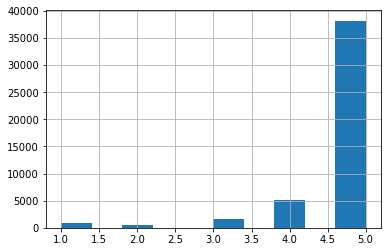

In [625]:
print(df['별점'].value_counts())
df['별점'].hist()

In [733]:
df_tmp=df
index_no=df_tmp[df_tmp['리뷰']==''].index
df_tmp.drop(index_no)

,리뷰,별점
0,저번에 리뷰이벤트참여 안적어서 못먹었던 떡볶이 오늘 맛나게 먹었어용 치킨도 물론 맛...,5
1,첨 시켜먹어보는대 너무 맛있게 잘 먹었습니다,5
2,후라이드는 역시 치킨플러스지요 기본 염지가 잘된 진짜 후라이드맛집 서비스로 치즈스틱...,5
3,배달이 약간 오래 걸리긴 했지만치킨 떡볶이 둘다 맛있어서 좋았네요,5
4,너무 맛있어요 떡볶이도 맛있고 날씨도 추운데 따뜻하고 빠르게 배달 왔어요,5
...,...,...
46322,배달도 빠르고 맛있어요,5
46323,잘먹었습니다 달력도 감사합니다 항상 5 동점만 먹어서 다른곳보다 양도 많은거 같아요,5
46324,리뷰쓰려는데 왜자꾸 리뷰내용에 개인정보쓰면 안된다고 하는거죠 게속 재시도 해봣는데도...,5
46325,치킨 맛있는건 정말 보증 하는데요 오늘 배달이 조금 아쉬워요 치킨 소스가 다 넘쳐서...,5


In [630]:
#혹시몰라 저장
df.to_csv('./df.csv',index=False)

In [3]:
df= pd.read_csv('./df_tmp.csv')

In [4]:
df=df.dropna(axis=0)
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45964 entries, 0 to 46326
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      45964 non-null  object
 1   별점      45964 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
# 점수를 기준으로 긍정(4,5)과 부정(1-3)으로 변환
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['별점'].apply(lambda x: rating_to_label(x))

In [7]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

1    43021
0     2943
Name: y, dtype: int64

1    43021
0     2943
Name: y, dtype: int64


<AxesSubplot:>

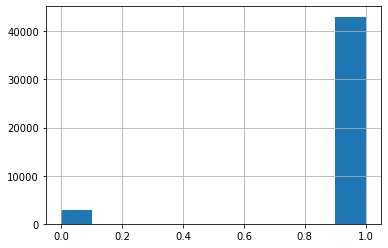

In [8]:
print(df['y'].value_counts())
df['y'].hist()

In [9]:
# 한글 불용어 사전 다운
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]
# 형태 조정, 특별한 용어 추가 불용어 
stopwords=[x[0]  for x in stopwords]

In [10]:
# df로 말뭉치로 만들면서 doc0은 부정, doc1은 긍정인 두개의 문서로 만듬
import konlpy
# tagger = konlpy.tag.Mecab()
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]
# stopwords = ['(,', '것', '계','간의']

for i, sentence in enumerate(df['리뷰']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords] # 불용어 제거
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])
   

['저번 리뷰 이벤트 참여 떡볶이 오늘 치킨 주문 치킨 추가 입금 주문 메뉴 아래쪽 체크 주문 오늘 저녁 마무리 감사', '', '후라이드 역시 치킨 플러스 기본 진짜 후라이드 맛집 서비스 치즈스틱 양도 최고 오늘 역시', '배달 치킨 떡볶이', '떡볶이 날씨 배달']
[['저번', '리뷰', '이벤트', '참여', '떡볶이', '오늘', '치킨', '주문', '치킨', '추가', '입금', '주문', '메뉴', '아래쪽', '체크', '주문', '오늘', '저녁', '마무리', '감사'], [], ['후라이드', '역시', '치킨', '플러스', '기본', '진짜', '후라이드', '맛집', '서비스', '치즈스틱', '양도', '최고', '오늘', '역시'], ['배달', '치킨', '떡볶이'], ['떡볶이', '날씨', '배달']]


In [11]:
# DTM 구하기, corpus 문서단위 * 단어사전 3482개 매트릭스 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

(45964, 7789)


,감사,떡볶이,리뷰,마무리,메뉴,아래쪽,오늘,이벤트,입금,저녁,...,단가,컨셉,타이,마슨있,자투리,함맛짐,캔들,인수,해봣는데,안산
0,1,1,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45961,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
45962,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

(45964, 7789)


,감사,떡볶이,리뷰,마무리,메뉴,아래쪽,오늘,이벤트,입금,저녁,...,단가,컨셉,타이,마슨있,자투리,함맛짐,캔들,인수,해봣는데,안산
0,0.212337,0.147593,0.15511,0.278708,0.177674,0.348092,0.306834,0.169244,0.325409,0.215216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.233489,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
3,0.000000,0.752970,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
4,0.000000,0.507036,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45959,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
45960,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
45961,0.000000,0.000000,0.29578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34454,0.34454,0.000000
45962,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.280479,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000


In [29]:
# data 로 종합 데이터 형성 
X = tf_idf
y=df['y']
data=pd.DataFrame()
data = pd.concat([y,pd.DataFrame(X)], axis=1)
data

,y,0,1,2,3,4,5,6,7,8,...,7779,7780,7781,7782,7783,7784,7785,7786,7787,7788
0,1.0,0.212337,0.147593,0.15511,0.278708,0.177674,0.348092,0.306834,0.169244,0.325409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.233489,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,0.752970,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,0.507036,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46322,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46323,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46324,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46325,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# 전체 데이터를 train 데이터 70%, test 데이터 30%로 분리
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(data, test_size = 0.3, random_state=256)
train_df.head()

,y,0,1,2,3,4,5,6,7,8,...,7779,7780,7781,7782,7783,7784,7785,7786,7787,7788
6133,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18359,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 데이터 설정 맞추기 
x_train = train_df.drop(['y'], axis=1)
y_train = train_df['y']
x_test = test_df.drop(['y'], axis=1)
y_test = test_df['y']

In [39]:
x_train=x_train.fillna(0)
y_train=y_train.fillna(0)
x_test=x_test.fillna(0)
y_test=y_test.fillna(0)

In [43]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
#x_train.dropna(how='all')
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [44]:
# classification result for test set
a1 = accuracy_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a1 )
print('precision: %.2f' % p1)
print('recall: %.2f' % r1)
print('F1: %.2f' % f1)

accuracy: 0.93
precision: 0.93
recall: 1.00
F1: 0.96


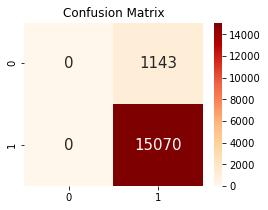

In [47]:
# confusion matrix, 데이터 불균형에 의한 과적합 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [125]:
df_tmp=df_tmp.reset_index(drop=True)

In [124]:
max(df_tmp[df_tmp['y']==1].index)

46325

In [126]:
# under-sampling 방법으로 불균현 해소 
positive_random_idx = df_tmp[df_tmp['y']==1].sample(2943, random_state=12).index.tolist()
print(max(positive_random_idx))
negative_random_idx = df_tmp[df_tmp['y']==0].sample(2943, random_state=12).index.tolist()
print(max(negative_random_idx))

45957
45963


In [89]:
tf_idf.shape

(45964, 7789)

In [128]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf[random_idx]
y = df_tmp['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [129]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [130]:
# classification result for test set
a2 = accuracy_score(y_test, y_pred)
p2 = precision_score(y_test, y_pred)
r2 =recall_score(y_test, y_pred)
f2= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a2 )
print('precision: %.2f' % p2)
print('recall: %.2f' % r2)
print('F1: %.2f' % f2)

accuracy: 0.72
precision: 0.69
recall: 0.81
F1: 0.74


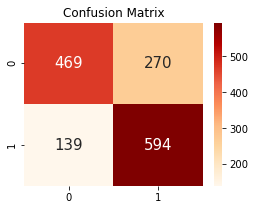

In [131]:
# 개선된 confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [132]:
# 분류 정확도 test_result 
pd.options.display.float_format = '{:.2f}'.format
tr1 = pd.DataFrame([a1,p1,r1,f1])
tr2 = pd.DataFrame([a2,p2,r2,f2])

test_result = pd.concat([tr1.T, tr2.T], axis=0)
test_result.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
test_result.index = ['1차 Imbalance Data', '2차 Under-sampling']
test_result



,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
1차 Imbalance Data,0.93,0.93,1.00,0.96
2차 Under-sampling,0.72,0.69,0.81,0.74


<BarContainer object of 7789 artists>

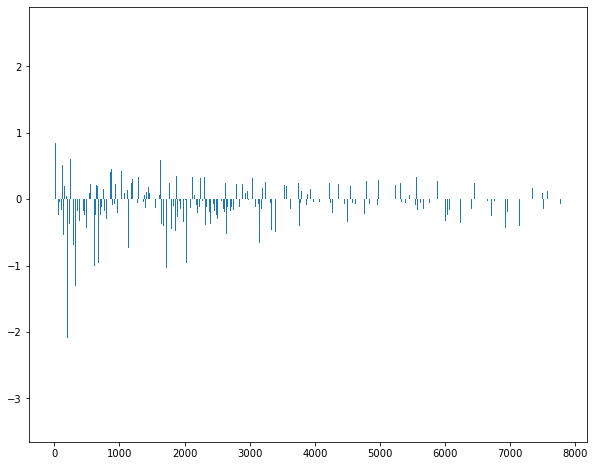

In [133]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [134]:
id_to_word = {v: k for k, v in vector.vocabulary_.items()}

In [135]:
# 일부 중요 원소들 단어사전 확인
print('긍정리뷰 키워드: ', id_to_word[79],id_to_word[92]) 
print('부정리뷰 키워드: ', id_to_word[416],id_to_word[513]) 

긍정리뷰 키워드:  삭제 지도
부정리뷰 키워드:  수준 도맛


In [137]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)

In [138]:
#  index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력
invert_index_vectorizer = id_to_word
pos_top_word=[] 
pos_top_score=[]
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    pos_top_word.append(invert_index_vectorizer[coef[1]])
    pos_top_score.append(coef[0])

최고 2.5970979402208734
역시 2.5128055959252826
떡볶이 1.9413845239189875
항상 1.7397554644500095
번창 1.581209514770192
아주 1.3867665289918156
단골 1.353992668226213
존맛 1.2754589658981696
자주 1.2543983761054645
강추 1.2142879788202943


In [139]:
neg_top_word=[] 
neg_top_score=[]

for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    neg_top_word.append(invert_index_vectorizer[coef[1]])
    neg_top_score.append(coef[0])

별로 -3.3549792430263983
전화 -3.1536306230311575
최악 -3.12494873803486
실망 -2.921457543607081
냄새 -2.713722391027604
그냥 -2.47627162896169
기름 -2.329703051680965
양은 -2.1057909632375837
느낌 -2.0888741870720366
신경 -2.0404433832422035


In [140]:
pos_top_word.reverse()
pos_top_score.reverse()
top_word=neg_top_word+ pos_top_word
top_score = neg_top_score+ pos_top_score

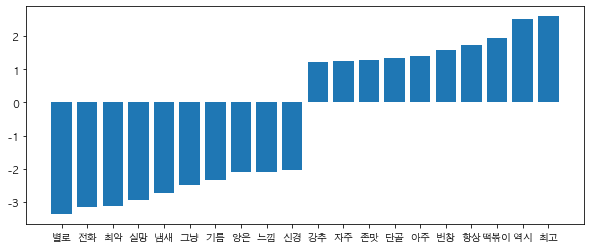

In [141]:
plt.figure(figsize=(10, 4))
plt.rc('font', family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결

plt.bar(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.bar(pos_top_word, pos_top_score, label = "긍정", color = 'g')

plt.bar(range(len(top_score)), top_score)
plt.xticks(range(len(top_word)), top_word)
plt.show()


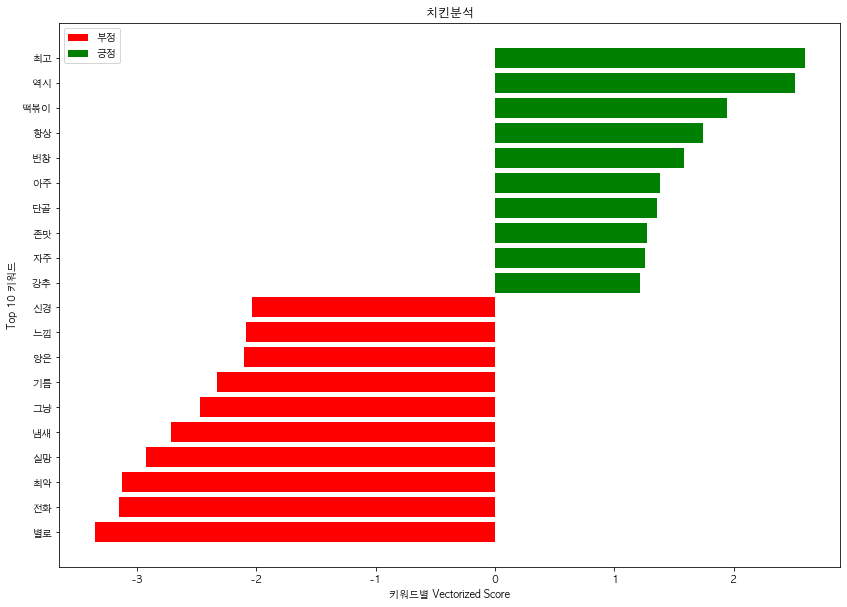

In [143]:
# 감정분석 결과 시각화 
import matplotlib.pyplot as plt
plt.figure(figsize=[14, 10])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')
# Giving the tilte for the plot
plt.title('치킨분석')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

In [348]:
#url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43Fydq6Co8zJWDqTsovrBkrN3mMNxafoJ1ZjbVXWA1Ad0o_9c6Q-qV4xoCQRUQAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
#User_agent check
#driver.execute_script('return navigator.userAgent')

#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#driver path 
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver')

#url 접속

url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43F8ROi2y0U2h8KlBwEuLVkCZMWDoxWDwgv4CeOBQhbvujsiqrsN_9qhoCRL0QAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
yogiyo_selector(url)

<ipython-input-348-bd126e97c34f>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver')
<ipython-input-347-3816bae0dde9>:108: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)


In [347]:
#함수
def yogiyo_selector(url):
    response = requests.get(url)
    
    driver.get(url)
    driver.implicitly_wait(10)
    time.sleep(2)
    driver.execute_script("location.reload()")
    time.sleep(2)    
    selector_tmp = []
    
    tmp1='document.querySelector('
    tmp2="'#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("
    tmp3=tmp1+tmp2
    tmp4=") > div')"
    tmp5=".click()"

    for i in range(10000):
        tmp6=str(i+1)
        tmp=tmp3+tmp6+tmp4+tmp5
        selector_tmp.append(tmp)

    selector_find=[]
    for i in range(10000):
        selector_find.append("#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("+str(i+1)+") > div")

    for i in range(10000):
        try:
            driver.execute_script(selector_tmp[i])

            search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
            element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
            try:
                element.click()
            except ValueError as m:
                print(m)
                time.sleep(1)
                driver.find_element_by_xpath(search_xpath).click()


            #페이지 정보 업로드
            html = driver.page_source
            html_source = bs(html, 'html.parser')
            soup = bs(html, 'html.parser')

            #리뷰수 파악
            num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
            review_num=[]
            for t in num:
                review_num.append(t.string)
            #총리뷰수 구하기
            total_review_num = int(review_num[1])

            #xpath초기화
            search_xpath=[]

            #xpath 설정
            if ((total_review_num//10) >0) :
                for i in range(total_review_num//10):
                    tcp= '//*[@id="review"]/li['+str((i*10+2))+']'
                    search_xpath.append(tcp)
                #xpath로 더보기
                for j in range(len(search_xpath)-1):
                    try:
                        element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
                        element.click()
                    except ValueError as m:
                        print('error_ ',j)
                        print(m)
                        time.sleep(1)
                        driver.find_element_by_xpath(search_xpath[j+1]).click()()
            else:
                print('pass')
                pass
            #저장
            html = driver.page_source
            html_source = bs(html, 'html.parser')
            soup = bs(html, 'html.parser')

            #review
            restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
            #review_award
            restaurant_star = html_source.find_all("span", attrs = {"class":'total'})
            #리뷰만

            review_list = []
            result_list = []
            #데이터 배열
            for i in restaurant_re:
                tmp=re.sub(r'[\n\r]+', '',i.string)
                tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
                review_list.append(tmp)
            #별점
            star_tmp=[]
            for q in restaurant_star:
                    g=(str(str(q)).count('full ng-scope'))
                    star_tmp.append(g)
            #데이터 프레임 형태로 만들기
            COLUM = 2
            ROW = len(star_tmp)
            total = [[0 for i in range(COLUM)] for j in range(ROW)] 
            for i in range(len(review_list)):
                total[i][0]=review_list[i]
            for i in range(len(star_tmp)):
                total[i][1]=(star_tmp[i])
        except:
            try:
                driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
            except:
                break
            break
            

selector를 사용하여야 한다.

#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child(1) > div
이게 요기요 가맹점에 들어가는 selector다. 

요기요의 경우 광고로 인한 노출이 두가지가 있다. 하지만 내가 필요한 정보와 중첩이 되기 떄문에 요기요에 등록된 것만 필요하다.
중간의 div:nth-child(숫자)에서 숫자가 1이면 최상단에 광고노출박스, 2면 슈퍼레드위크 추천, 3이면 일반이다.

뒤 div:nth-child(1)가 핵심이다.
1~n으로 늘어난다. 따라서 이부분은 추출을 할 수 없어서 강제로 for문으로 만들어 주었다.
하지만 \가 출력되는 에러가 있어서 복잡하지만 하기의 방법처럼 추가를 해주어야 한다.

In [327]:

selector_tmp = []

tmp1='document.querySelector('
tmp2="'#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("
tmp3=tmp1+tmp2
tmp4=") > div')"
tmp5=".click()"

for i in range(10000):
    tmp6=str(i+1)
    tmp=tmp3+tmp6+tmp4+tmp5
    selector_tmp.append(tmp)
    
selector_find=[]
for i in range(10000):
    selector_find.append("#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("+str(i+1)+") > div")